In [409]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import argparse
import os
import cv2
import seaborn as sns
sns.set()
import tensorflow.compat.v1 as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

DATADIR = "F:/Modified Data"
CATEGORIES = ["a", "b", "c"]

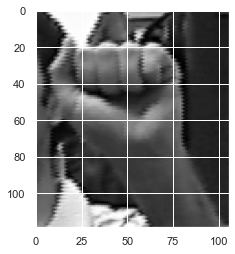

In [410]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [411]:
# Print the shape of the image
print(img_array.shape)

(119, 106)


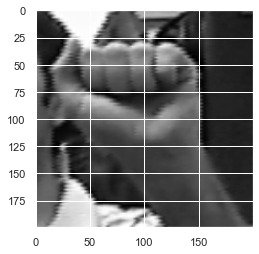

In [412]:
IMG_SIZE = 75

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [413]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    return training_data

training_data = create_training_data()

2526
(200, 200)


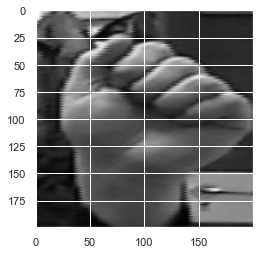

0


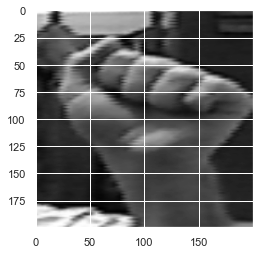

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [414]:
print(len(training_data))
print(training_data[0][0].shape)

plt.imshow(training_data[841][0], cmap = 'gray')
plt.show()

#Creating label dataset: 0, 1, and 2 means a, b, and c, respectively
label_data = []
letter = 0
for img in range(0,len(training_data),842):
    label_data.append(np.matlib.repmat(letter, 1, 842))
    letter = letter + 1
#print(label_data[1][0].shape)
print(label_data[0][0][50])
plt.imshow(training_data[69][0], cmap = 'gray')
plt.show()
labels = numpy.array(label_data).reshape((2526,1))

#Convert to categorical
y = to_categorical(labels)

#labels_reshape = labels.reshape((376,1))
print(y)
#labels

In [415]:
#import random

#random.shuffle(training_data)

In [416]:
#for sample in training_data:
    #print(sample[1])

In [417]:
X_train = []
y_train = []

In [418]:
for features, label in training_data:
    X_train.append(features)
    y_train.append(label)


X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = to_categorical(np.array(y_train))



print(y_train.shape)
print(X_train.shape)

(2526, 3)
(2526, 200, 200, 1)


In [419]:
# use train_test_split function to crear validation training set from train data.
# Split data into 80% train and 20% test subsets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

In [420]:
# Importing the required layers operation and activation function to build your model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)

#from keras.models import Sequential,Input,Model
#from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [421]:
# Defining basic parameters
batch_size = 32
epochs = 2
num_classes = 3

In [422]:
# Building the CNN model

X_train = X_train/505

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(IMG_SIZE,IMG_SIZE,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes, activation='softmax'))

In [423]:
# Compiling your model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [424]:
# Verify the outpur shape for each layer and the number of trainable parameters.
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 200, 200, 32)      320       
_________________________________________________________________
module_wrapper_60 (ModuleWra (None, 200, 200, 32)      0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
module_wrapper_61 (ModuleWra (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 50, 50, 128)     

In [425]:
len(X_train)

2020

[1. 0. 0.]


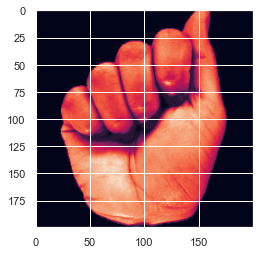

In [426]:
plt.imshow(X_train[100,:,:])
print(y_train[100])

In [427]:
# Train your model
#model.fit(X, y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=())
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)


Epoch 1/2
64/64 [==============================] - 59s 908ms/step - loss: 0.2344 - accuracy: 0.8480
Epoch 2/2
64/64 [==============================] - 59s 927ms/step - loss: 0.0239 - accuracy: 0.9921


In [428]:
# Evaluating the performance of the model usign the validation data
test_eval = model.evaluate(X_validation, y_validation, verbose=1)
print("The loss of the model is {0:f}, and the accurracy is {1:f}".format(test_eval[0],test_eval[1]))

16/16 [==============================] - 4s 249ms/step - loss: 217.5462 - accuracy: 0.7609
The loss of the model is 217.546204, and the accurracy is 0.760870


In [429]:
# using fashion_trained_history information to provide the performance of the model during the training stage
accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))

In [430]:
# Predicting the new data "test_X, y_test"
predicted = model.predict(X_validation)

# taking the max argument
predicted = np.argmax(np.round(predicted),axis=1)
print(predicted.shape)
print(np.argmax(y_validation))
#print("size fo predicted array {0:d}x{1:d} and size of y_test array {2:d}".format(predicted.shape[0],predicted.shape[1],y_test.shape))

(506,)
1


In [431]:
#Printing Classification reports


#print(y_validation)
#print(np.argmax(y_validation, axis=1))
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(np.argmax(y_validation, axis=1), predicted, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.96      0.81      0.88       160
     Class 1       0.60      1.00      0.75       175
     Class 2       1.00      0.47      0.64       171

    accuracy                           0.76       506
   macro avg       0.85      0.76      0.76       506
weighted avg       0.85      0.76      0.75       506



In [432]:
# Now let's select those samples that were correctly classified.
correct = np.where(predicted==y_validation)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_validation[correct].reshape(50,50,1), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted[correct], y_validation[correct]))
    plt.tight_layout()

Found 0 correct labels


<ipython-input-432-1783bfbf314e>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct = np.where(predicted==y_validation)[0]


In [433]:
# Now let's select those samples that were incorrectly classified.
#incorrect = np.where(predicted!=y_validation)[0]
#print("Found %d incorrect labels" % len(incorrect))
#for i, incorrect in enumerate(incorrect[:9]):
#    plt.subplot(3,3,i+1)
#    plt.imshow(X_validation[incorrect].reshape(50,50,1), cmap='gray', interpolation='none')
#    plt.title("Predicted {}, Class {}".format(predicted[incorrect], y_validation[incorrect]))
#    plt.tight_layout()

In [434]:
print(target_names)

['Class 0', 'Class 1', 'Class 2']


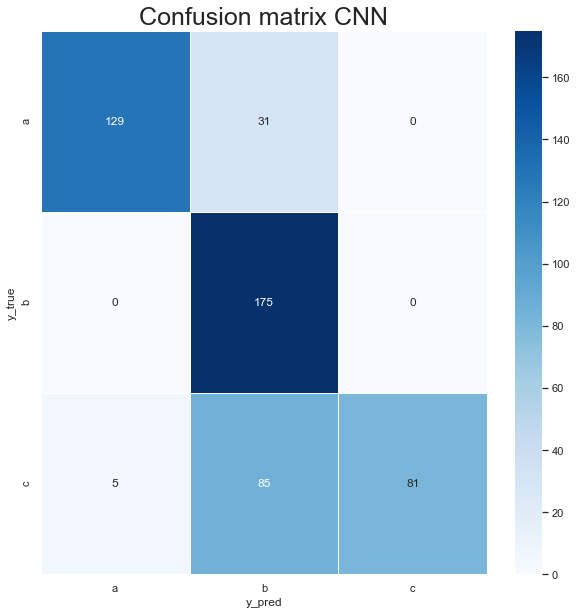

(506,)


In [435]:
from sklearn.metrics import confusion_matrix

labels=['a','b','c']
y_classes = np.array([np.argmax(y, axis=None, out=None) for y in y_validation])
cm=confusion_matrix(y_classes,predicted)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap = "Blues",linewidth=.5,linecolor="w",fmt=".0f",ax=ax)
plt.title("Confusion matrix CNN", size = 25)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()
print(y_classes.shape)